In [1]:
from PIL import Image;
import numpy as np;
import skimage as ski;
from skimage import exposure;
from skimage import filters;
from skimage import morphology;
from skimage import feature;
from skimage import segmentation;

In [2]:
from matplotlib import pyplot as plt;

In [3]:
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['figure.figsize'] = [24,18]

(2200, 4854)


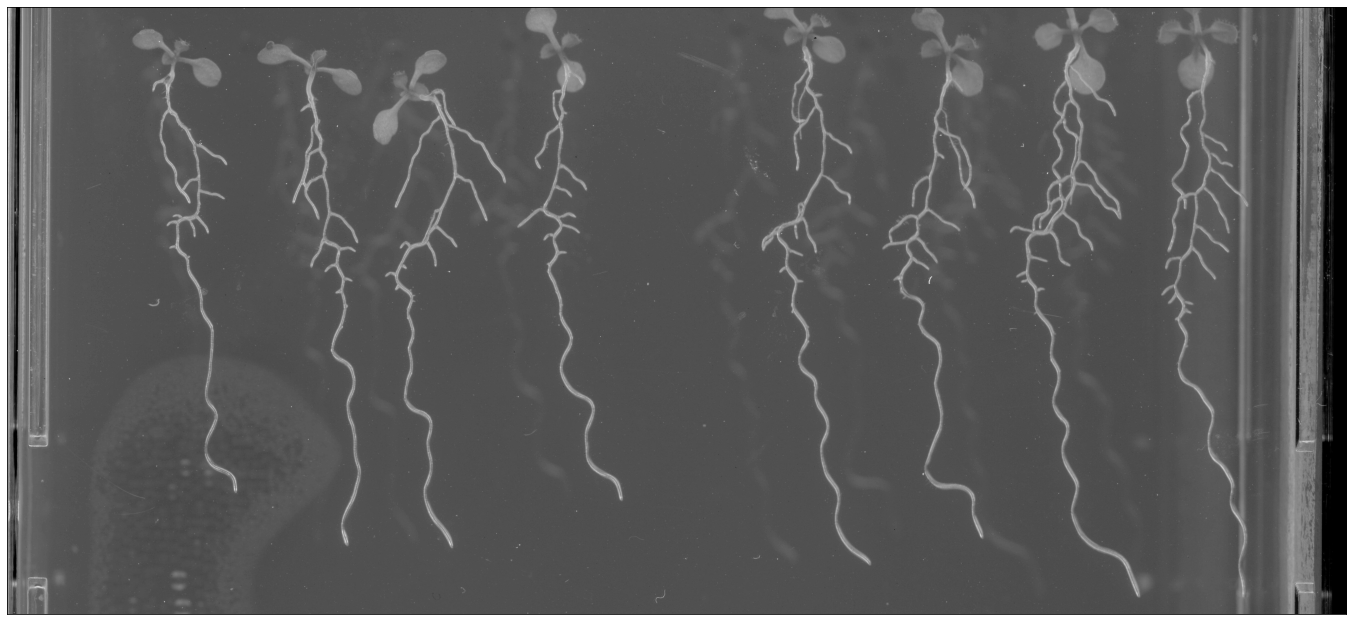

In [4]:
img = Image.open('./source_images/roots1.png')
img = np.array(img)[500:2700,:]
img = np.mean(img,axis=2)
print(img.shape)
plt.imshow(img,cmap='gray')

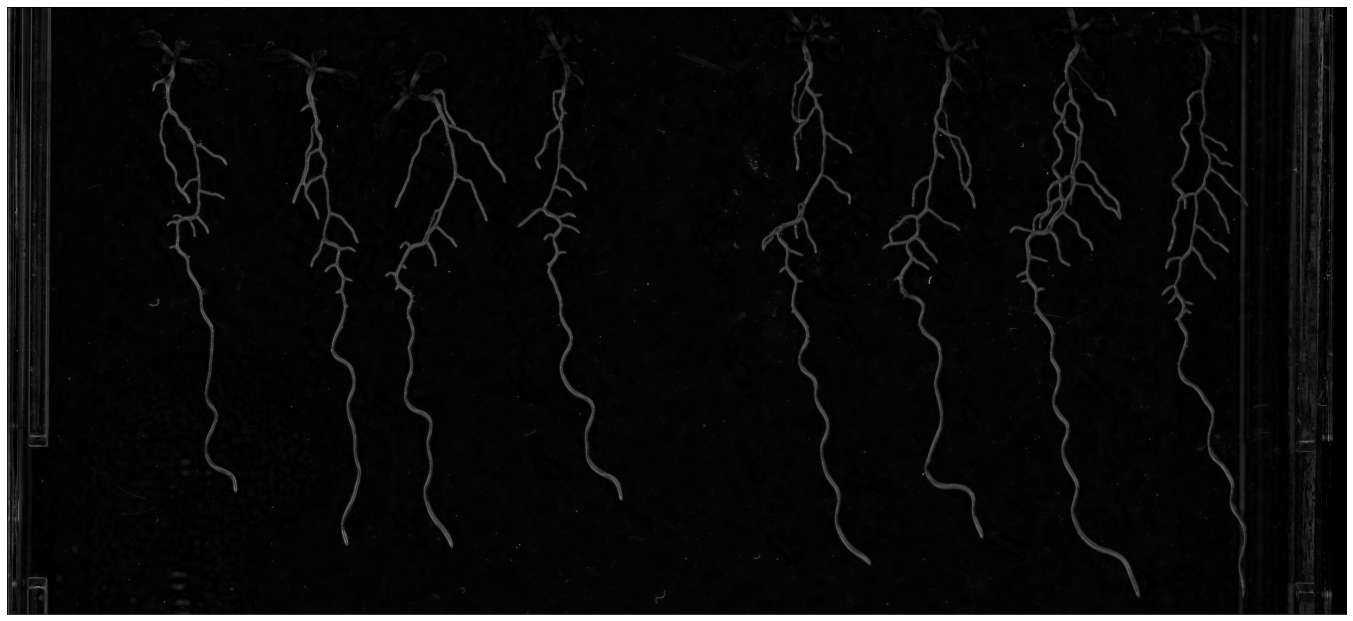

In [8]:
footprint = ski.morphology.disk(15)
img_tophat = ski.morphology.white_tophat(img,footprint)
plt.imshow(img_tophat,cmap='gray')